In [1]:
# to read and wrangle data
import pandas as pd

# to import data from LA Data portal
from sodapy import Socrata

# to create spatial data
import geopandas as gpd

# for basemaps
import contextily as ctx

# For spatial statistics
import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation

import libpysal as lps

# Graphics
import matplotlib.pyplot as plt
import plotly.express as px

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [5]:
# city of Carson population block group data from american community survey census data
carson_income = gpd.read_file('data/acs2019_5yr_B19001_15000US060375433222.geojson')

In [7]:
carson_income.shape

(60, 37)

In [8]:
carson_income.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             60 non-null     object  
 1   name              60 non-null     object  
 2   B19001001         60 non-null     float64 
 3   B19001001, Error  60 non-null     float64 
 4   B19001002         60 non-null     float64 
 5   B19001002, Error  60 non-null     float64 
 6   B19001003         60 non-null     float64 
 7   B19001003, Error  60 non-null     float64 
 8   B19001004         60 non-null     float64 
 9   B19001004, Error  60 non-null     float64 
 10  B19001005         60 non-null     float64 
 11  B19001005, Error  60 non-null     float64 
 12  B19001006         60 non-null     float64 
 13  B19001006, Error  60 non-null     float64 
 14  B19001007         60 non-null     float64 
 15  B19001007, Error  60 non-null     float64 
 16  B19001008         60

<AxesSubplot:>

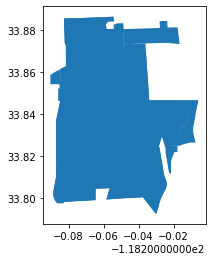

In [14]:
carson_income.plot()

In [15]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [19]:
list(carson_income)

['geoid',
 'name',
 'B19001001',
 'B19001001, Error',
 'B19001002',
 'B19001002, Error',
 'B19001003',
 'B19001003, Error',
 'B19001004',
 'B19001004, Error',
 'B19001005',
 'B19001005, Error',
 'B19001006',
 'B19001006, Error',
 'B19001007',
 'B19001007, Error',
 'B19001008',
 'B19001008, Error',
 'B19001009',
 'B19001009, Error',
 'B19001010',
 'B19001010, Error',
 'B19001011',
 'B19001011, Error',
 'B19001012',
 'B19001012, Error',
 'B19001013',
 'B19001013, Error',
 'B19001014',
 'B19001014, Error',
 'B19001015',
 'B19001015, Error',
 'B19001016',
 'B19001016, Error',
 'B19001017',
 'B19001017, Error',
 'geometry']

In [20]:
columns_to_keep=['geoid',
 'name',
 'B19001001',
 'B19001002',
 'B19001003',
 'B19001004',
 'B19001005',
 'B19001006',
 'B19001007',
 'B19001008',
 'B19001009',
 'B19001010',
 'B19001011',
 'B19001012',
 'B19001013',
 'B19001014',
 'B19001015',
 'B19001016',
 'B19001017',
 'geometry']

In [21]:
carson_income = carson_income[columns_to_keep]

In [22]:
carson_income.head()

,geoid,name,B19001001,B19001002,B19001003,B19001004,B19001005,B19001006,B19001007,B19001008,B19001009,B19001010,B19001011,B19001012,B19001013,B19001014,B19001015,B19001016,B19001017,geometry
0,15000US060375410021,"Block Group 1, Los Angeles, CA",982.0,58.0,25.0,0.0,86.0,17.0,0.0,29.0,65.0,46.0,116.0,113.0,134.0,151.0,47.0,80.0,15.0,"MULTIPOLYGON (((-118.28273 33.88547, -118.2826..."
1,15000US060375431005,"Block Group 5, Los Angeles, CA",175.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,11.0,0.0,20.0,17.0,53.0,40.0,0.0,9.0,0.0,"MULTIPOLYGON (((-118.26600 33.87342, -118.2659..."
2,15000US060375431006,"Block Group 6, Los Angeles, CA",284.0,8.0,45.0,30.0,0.0,12.0,16.0,0.0,10.0,0.0,7.0,23.0,14.0,37.0,56.0,0.0,26.0,"MULTIPOLYGON (((-118.26523 33.88598, -118.2637..."
3,15000US060375432024,"Block Group 4, Los Angeles, CA",254.0,0.0,0.0,32.0,30.0,33.0,0.0,15.0,0.0,15.0,51.0,7.0,20.0,16.0,0.0,23.0,12.0,"MULTIPOLYGON (((-118.24866 33.88042, -118.2482..."
4,15000US060375433041,"Block Group 1, Los Angeles, CA",353.0,9.0,0.0,29.0,0.0,0.0,0.0,0.0,24.0,7.0,11.0,57.0,52.0,32.0,4.0,75.0,53.0,"MULTIPOLYGON (((-118.24459 33.85660, -118.2437..."


In [23]:
list(carson_income)

['geoid',
 'name',
 'B19001001',
 'B19001002',
 'B19001003',
 'B19001004',
 'B19001005',
 'B19001006',
 'B19001007',
 'B19001008',
 'B19001009',
 'B19001010',
 'B19001011',
 'B19001012',
 'B19001013',
 'B19001014',
 'B19001015',
 'B19001016',
 'B19001017',
 'geometry']

In [25]:
carson_income.columns = ['geoid',
 'name',
 'Total',
 'Less than $10,000',
 '$10,000 to $14,999',
 '$15,000 to $19,999',
 '$20,000 to $24,999',
 '$25,000 to $29,999',
 '$30,000 to $34,999',
 '$35,000 to $39,999',
 '$40,000 to $44,999',
 '$45,000 to $49,999',
 '$50,000 to $59,999',
 '$60,000 to $74,999',
 '$75,000 to $99,999',
 '$100,000 to $124,999',
 '$125,000 to $149,999',
 '$150,000 to $199,999',
 '$200,000 or more',
 'geometry']

In [26]:
carson_income.head()

,geoid,name,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",geometry
0,15000US060375410021,"Block Group 1, Los Angeles, CA",982.0,58.0,25.0,0.0,86.0,17.0,0.0,29.0,65.0,46.0,116.0,113.0,134.0,151.0,47.0,80.0,15.0,"MULTIPOLYGON (((-118.28273 33.88547, -118.2826..."
1,15000US060375431005,"Block Group 5, Los Angeles, CA",175.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,11.0,0.0,20.0,17.0,53.0,40.0,0.0,9.0,0.0,"MULTIPOLYGON (((-118.26600 33.87342, -118.2659..."
2,15000US060375431006,"Block Group 6, Los Angeles, CA",284.0,8.0,45.0,30.0,0.0,12.0,16.0,0.0,10.0,0.0,7.0,23.0,14.0,37.0,56.0,0.0,26.0,"MULTIPOLYGON (((-118.26523 33.88598, -118.2637..."
3,15000US060375432024,"Block Group 4, Los Angeles, CA",254.0,0.0,0.0,32.0,30.0,33.0,0.0,15.0,0.0,15.0,51.0,7.0,20.0,16.0,0.0,23.0,12.0,"MULTIPOLYGON (((-118.24866 33.88042, -118.2482..."
4,15000US060375433041,"Block Group 1, Los Angeles, CA",353.0,9.0,0.0,29.0,0.0,0.0,0.0,0.0,24.0,7.0,11.0,57.0,52.0,32.0,4.0,75.0,53.0,"MULTIPOLYGON (((-118.24459 33.85660, -118.2437..."
